# Homework 3

## Exploratory Data Analysis

Modules needed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', 50)

### 1.1 IRIS flower

####
Read data

In [4]:
#data_iris = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv')

data_iris = pd.read_csv('IRIS.csv')

data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#get statistics about the data
data_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Visualize data in scatter plots

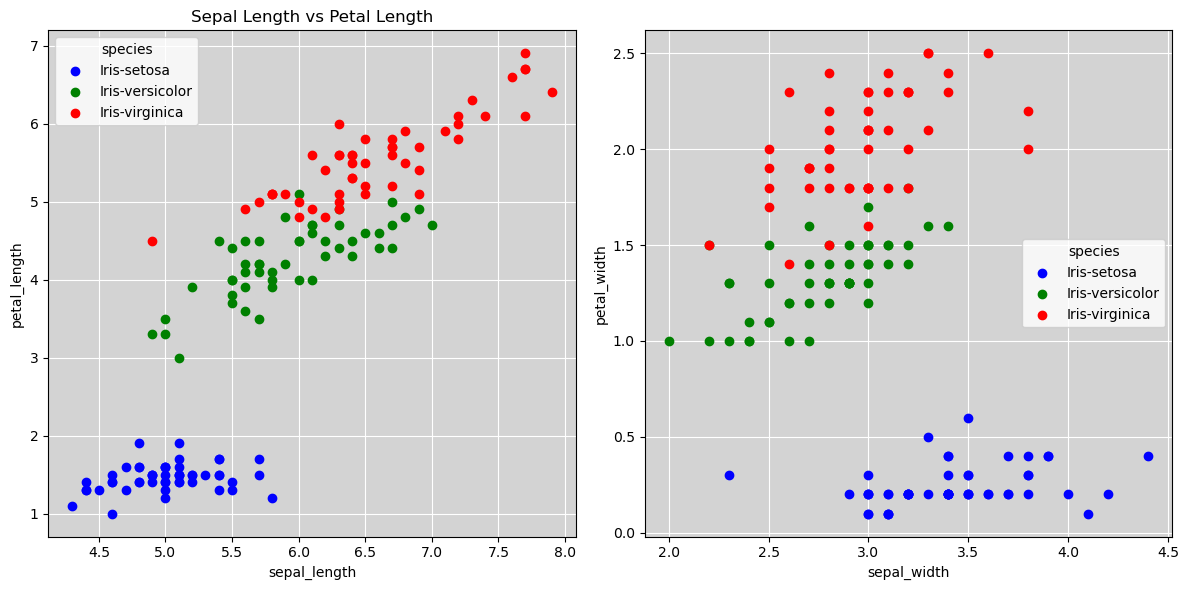

In [8]:

#create dictionary to assign color to each type of iris flower
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}

#prepare for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

#plot data for each species in same subplot 1
for species, color in colors.items():
    subset = data_iris[data_iris["species"] == species]
    
    axes[0].scatter(subset['sepal_length'], subset['petal_length'], label=species, color=color, zorder=4)
    axes[0].set_title("Sepal Length vs Petal Length")
    axes[0].set_xlabel("sepal_length")
    axes[0].set_ylabel("petal_length")
    axes[0].legend(title="species")
    axes[0].grid(True, color='white', zorder=0) 
    axes[0].set_facecolor("lightgrey")  

#plot data for each species in same subplot 2
for species, color in colors.items():
    subset = data_iris[data_iris['species'] == species]

    axes[1].scatter(subset['sepal_width'], subset['petal_width'], label=species, color=color, zorder=4)
    axes[1].set_xlabel("sepal_width")
    axes[1].set_ylabel("petal_width")
    axes[1].legend(title="species")
    axes[1].grid(True, color='white', zorder=0)  
    axes[1].set_facecolor("lightgrey") 

# Insert padding between subplots to avoid overlap
plt.tight_layout()

plt.show()


For the length:

It seems there is a linear positve correlation between petal length and sepal length for the case
of the species Iris-versicolor and Iris-virginica. Iris-virginica grows more in length. The ratio between petal length and sepal length is closer to 1.

In the case of species Iris-setosa, the petal length appears to stay more or less short
in relation to sepal length. The ration varies approximately between 0.20 - 0.40.


For the width:

The petal width of Iris-setosa seems to be constant and short independently of the sepal width, while there is a greater variation for the Iris-versicolor and Iris-virginica.

#### Visualize data in boxplots

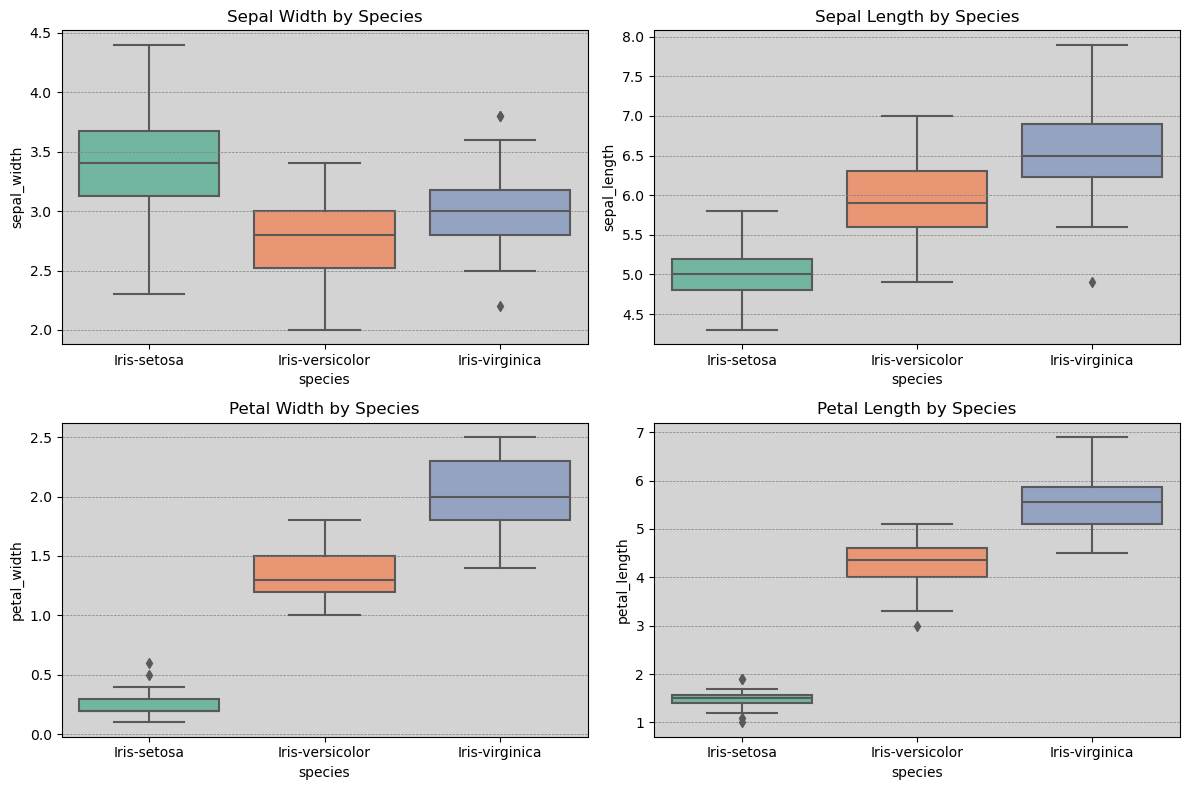

In [10]:
# Create figure with four subplots, 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Create boxplot for sepal_width
sns.boxplot(data=data_iris, x="species", y="sepal_width", ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title("Sepal Width by Species")
axes[0, 0].set_facecolor("lightgrey") 
axes[0, 0].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Create boxplot for sepal_length
sns.boxplot(data=data_iris, x="species", y="sepal_length", ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title("Sepal Length by Species")
axes[0, 1].set_facecolor("lightgrey")  
axes[0, 1].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Create boxplot for petal_width
sns.boxplot(data=data_iris, x="species", y="petal_width", ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title("Petal Width by Species")
axes[1, 0].set_facecolor("lightgrey")  
axes[1, 0].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Creat boxplot for petal_length
sns.boxplot(data=data_iris, x="species", y="petal_length", ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title("Petal Length by Species")
axes[1, 1].set_facecolor("lightgrey")  
axes[1, 1].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)


# Lägg till padding mellan subplotarna
plt.tight_layout()

# Visa plotten
plt.show()

The distribution of the sepal width among each species appears to be relatively normally distributed with different medians and deviation. 

The median length is different in terms of sepal length and width for the three species - the Iris-setosa beeing the widest in sepal width whereas Iris-virginica beeing the longest. 



#### Visualize data in pairs plots

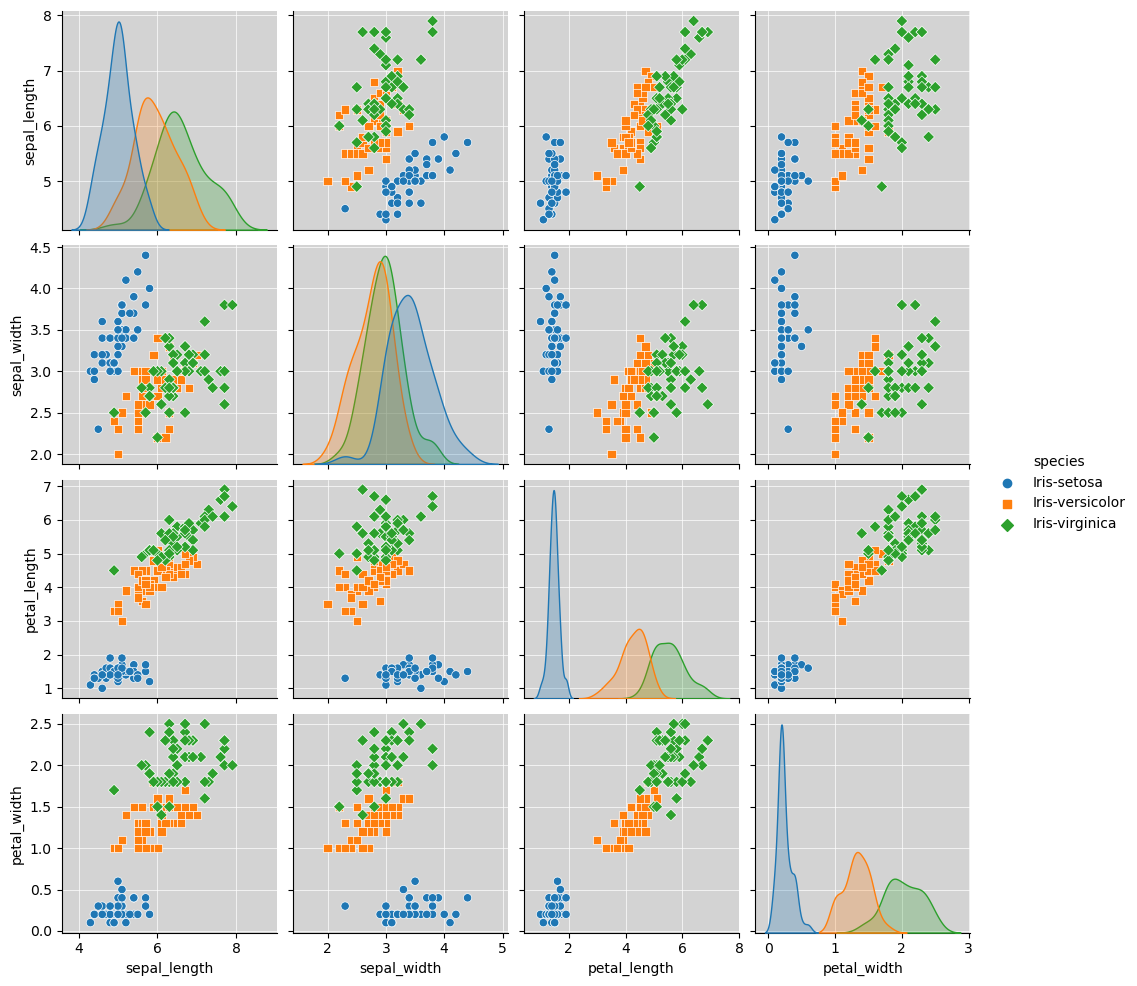

In [14]:
# Filter warnings
warnings.filterwarnings("ignore")

# Create pair plots
pair_plot = sns.pairplot(data_iris, hue='species', diag_kind='kde', markers=["o", "s", "D"])

# Add grid and background color
for ax in pair_plot.axes.flatten():
    ax.set_facecolor("lightgrey") 
    ax.grid(True, linestyle='-', color='white', linewidth=0.5, zorder=0)
    
     # make sure scatterpoints are brought to front of grid
    for c in ax.collections:
        c.set_zorder(5)
        
plt.show()
                        
# Reset warnings
warnings.resetwarnings()

For each species the length and width are approximately normally distributed. Iris-setosa beeing the shortest in petal width as well as petal length with small standard deviation. It seems that the petal length and width stay short while it can vary in depal dimensions.

Iris-versivolor and Iris-virginica are basically similar in dimensions where there appears to be almost linear dependence between the petal width/ petal length, sepal length/ petal length



### 1.2 Birdwatching 

Read data and dispay

In [28]:
df_artport = pd.read_csv('artportalen.csv')

df_artport.head(10)



,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,Lokalnamn,Ostkoordinat,Nordkoordinat,Noggrannhet,Diffusion,Län,Kommun,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
0,97785066,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",2,NaN,NaN,NaN,"Björnstigen 129,Bergshamra,Solna",1626890,6586736,25,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
1,97785067,54989,NaN,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2,NaN,NaN,NaN,"Björnstigen 129,Bergshamra,Solna",1626890,6586736,25,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
2,97785310,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",1,NaN,NaN,NaN,Frösundavik,1626094,6585523,100,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
3,97786982,54735,NaN,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1,NaN,hona,NaN,Frösundavik,1626094,6585523,100,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
4,97786985,54944,NaN,Skata,Pica pica,"(Linnaeus, 1758)",2,NaN,NaN,NaN,Tivoli,1626780,6585860,125,0,Stockholm,Solna,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NaN,NaN,Henrik Spovin,Henrik Spovin
5,97786990,55232,NT,Björktrast,Turdus pilaris,"Linnaeus, 1758",10,NaN,NaN,NaN,Frösundavik,1626094,6585523,100,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
6,97788368,53958,NaN,Knölsvan,Cygnus olor,"(J.F.Gmelin, 1789)",1,NaN,NaN,NaN,Bergshamra,1626623,6586750,1344,0,Stockholm,Solna,Uppland,Solna,2022-01-01,09:10,2022-01-01,09:10,NaN,NaN,jesper sollerman,jesper sollerman
7,97788369,54006,NaN,Gräsand,Anas platyrhynchos,"Linnaeus, 1758",5,NaN,NaN,NaN,Bergshamra,1626623,6586750,1344,0,Stockholm,Solna,Uppland,Solna,2022-01-01,08:47,2022-01-01,08:47,NaN,NaN,jesper sollerman,jesper sollerman
8,97788370,54035,NaN,Vigg,Aythya fuligula,"(Linnaeus, 1758)",5,NaN,NaN,NaN,Bergshamra,1626623,6586750,1344,0,Stockholm,Solna,Uppland,Solna,2022-01-01,08:47,2022-01-01,08:47,NaN,NaN,jesper sollerman,jesper sollerman
9,97788371,54069,NaN,Knipa,Bucephala clangula,"(Linnaeus, 1758)",2,NaN,NaN,NaN,Bergshamra,1626623,6586750,1344,0,Stockholm,Solna,Uppland,Solna,2022-01-01,08:47,2022-01-01,08:47,NaN,NaN,jesper sollerman,jesper sollerman


####
Get info about the variables

In [18]:
df_artport.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21916 entries, 0 to 21915
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      21916 non-null  int64 
 1   Taxonsorteringsordning  21916 non-null  int64 
 2   Rödlistade              4777 non-null   object
 3   Artnamn                 21916 non-null  object
 4   Vetenskapligt namn      21916 non-null  object
 5   Auktor                  21843 non-null  object
 6   Antal                   21916 non-null  object
 7   Ålder/stadium           757 non-null    object
 8   Kön                     2023 non-null   object
 9   Aktivitet               16745 non-null  object
 10  Lokalnamn               21916 non-null  object
 11  Ostkoordinat            21916 non-null  int64 
 12  Nordkoordinat           21916 non-null  int64 
 13  Noggrannhet             21916 non-null  int64 
 14  Diffusion               21916 non-null  int64 
 15  Lä

####
Convert the type of objects to simplify analysis


In [20]:

#convert to float
df_artport['Antal'] = pd.to_numeric(df_artport['Antal'], errors='coerce')

#convert to date
df_artport['Startdatum'] = pd.to_datetime(df_artport['Startdatum'], errors='coerce')
df_artport['Slutdatum'] = pd.to_datetime(df_artport['Slutdatum'], errors='coerce')


####
What are the most prevalent species?

In [22]:

#group data by species and count the number of observations for each species
species_count_df = df_artport.groupby('Artnamn', as_index=False)['Antal'].sum()

species_count_df_ordered = species_count_df.sort_values(by='Antal', ascending=False)

species_count_df_ordered

,Artnamn,Antal
42,Grönsiska,20211.0
120,Sothöna,8308.0
29,Gräsand,7167.0
132,Storskrake,6750.0
168,Vitkindad gås,6345.0
...,...,...
17,Ejder,1.0
123,Spillkråka,1.0
130,Storlom,1.0
93,"Ormvråk, underarten buteo",1.0


In [24]:

print("Most prevalent species:\n")

species_count_df_ordered.head(5)

Most prevalent species:



,Artnamn,Antal
42,Grönsiska,20211.0
120,Sothöna,8308.0
29,Gräsand,7167.0
132,Storskrake,6750.0
168,Vitkindad gås,6345.0


####

The top 3 species that are most prevalent

In [78]:
species_count_df_ordered.head(3)

,Artnamn,Antal
42,Grönsiska,20211.0
120,Sothöna,8308.0
29,Gräsand,7167.0


####
What is the monthly distribution of the top 3 most prevelant species?


In [84]:

#create new column ÅrMån to original dataframe
df_artport['ÅrMån'] = df_artport['Startdatum'].dt.to_period('M')

#Identify the species of interest
specific_species = ['Grönsiska', 'Sothöna', 'Gräsand']

#filter data
filtered_df_artport = df_artport[df_artport['Artnamn'].isin(specific_species)]

#group data and sum the number of observations per month. Make ÅrMån the heading of the data frame
grouped_df = filtered_df_artport.groupby(['Artnamn', 'ÅrMån'])['Antal'].sum().unstack(fill_value=0)

grouped_df


ÅrMån,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
Artnamn,,,,,,
Gräsand,2953.0,1583.0,1152.0,858.0,515.0,106.0
Grönsiska,19507.0,648.0,33.0,6.0,10.0,7.0
Sothöna,2142.0,2100.0,3052.0,614.0,288.0,112.0


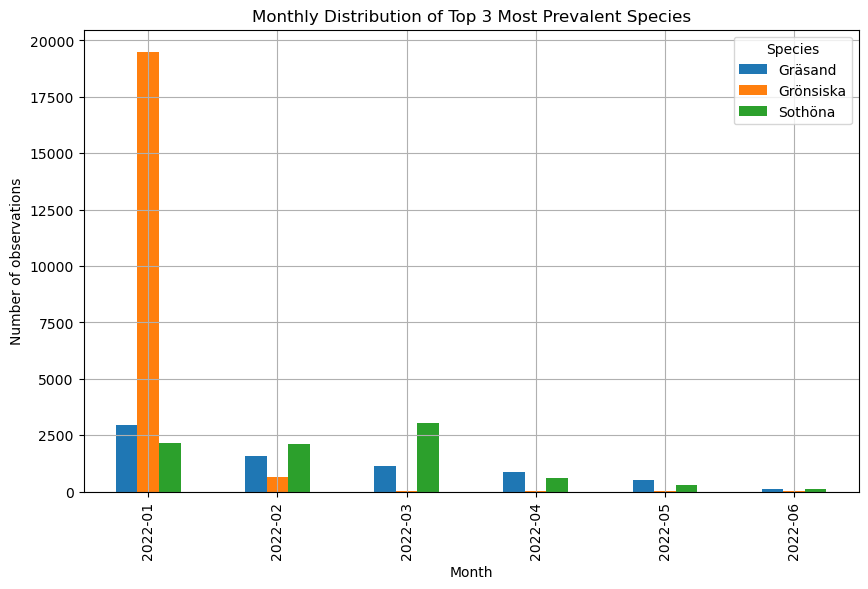

In [86]:

# transpose the dataframe and plot a barplot
grouped_df.T.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Distribution of Top 3 Most Prevalent Species')
plt.xlabel('Month')
plt.ylabel('Number of observations')
plt.legend(title='Species')
plt.grid(True)
plt.show()



In [92]:

print(f'The rarest species is ')

species_count_df_ordered.iloc[[-1]]


The rarest species is 


,Artnamn,Antal
90,Ob. korsnäbb,0.0


Not completed...

Questions about the dataset.

Look into variables:

lokalnamn - distribution of where observed

Artnamn - how many different species observed



### Part 3 - Predicting strokes



In [101]:


df_strokes = pd.read_csv('stroke-data.csv')

df_strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


####
Get statistics about variables of the type float

In [103]:
df_strokes[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [105]:
#check amount missing data for the different variables
df_strokes.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

####

Questions:

How smoking status related to stroke?

How is hypertension related to stroke?

How is average glucose level related to stroke?




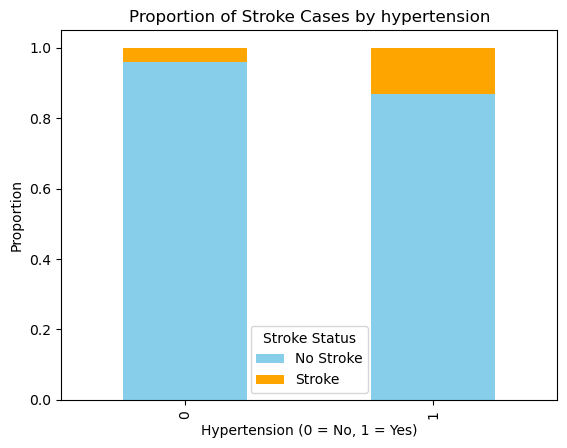

In [109]:
#Group data to get the proportional distribution of stroke status for those with heart disease 
stroke_counts = df_strokes.groupby('hypertension')['stroke'].value_counts(normalize=True).unstack()

# Plot a bar diagram
stroke_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title("Proportion of Stroke Cases by hypertension")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.legend(["No Stroke", "Stroke"], title="Stroke Status")
plt.show()

A larger proportion among people with hypertension had stroke 

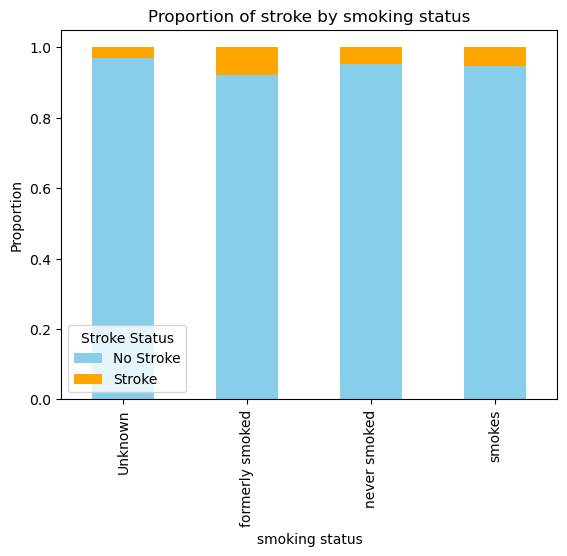

In [112]:
#Group data to get the proportional distribution of stroke status for those with heart disease 
stroke_counts = df_strokes.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack()

# Plot a bar diagram
stroke_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title("Proportion of stroke by smoking status")
plt.xlabel("smoking status")
plt.ylabel("Proportion")
plt.legend(["No Stroke", "Stroke"], title="Stroke Status")
plt.show()

It appears that smoking status does not effect the risk of getting stroke.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


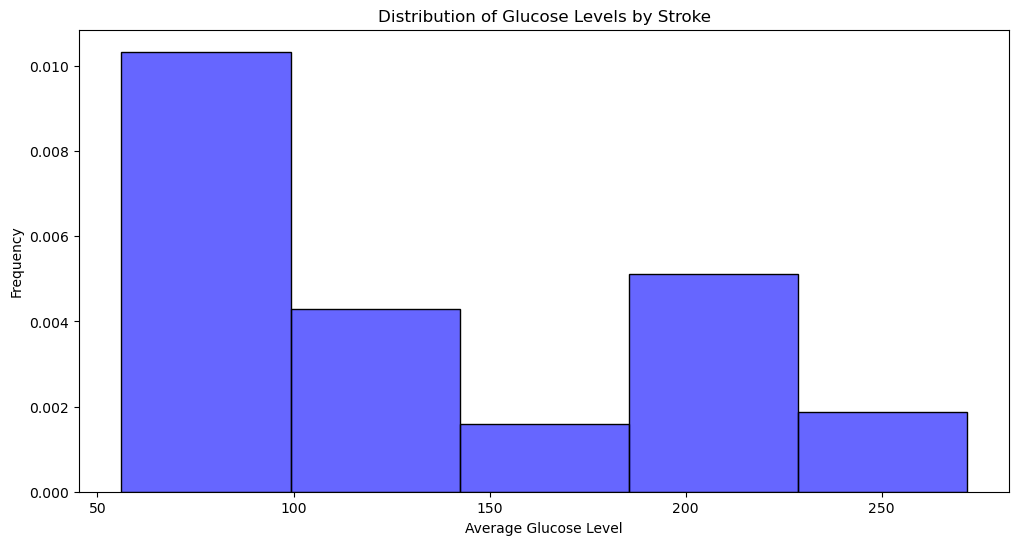

In [149]:
stroke_data = df_strokes[df_strokes['stroke'] == 1]

plt.figure(figsize=(12, 6))

# Histogram for patients with stroke
sns.histplot(stroke_data['avg_glucose_level'], bins=5, color='blue', alpha=0.6, label='Stroke', stat='density')

plt.title('Distribution of Glucose Levels by Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

## Assignment is not completed......

work in progress...

## Part 4 - Data preparation

#### Cleaning data 

Handle missing values in the dataset and convert all relevant cells to numbers.

In [10]:
# Read data from file
df_cellPhones = pd.read_csv('cell_phones_total.csv')

# Make sure to display all columns
pd.set_option('display.max_columns', 100)

df_cellPhones


,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,20,NaN,NaN,1720,3000,3400,5380,12k,15k,53k,61.8k,70k,98.4k,103k,109k,114k,121k,128k,132k,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN
1,AFG,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25k,200k,600k,1.2M,2.52M,4.67M,7.9M,10.5M,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1100,1820,1990,3300,7050,9820,24k,25.8k,75k,140k,350k,740k,1.61M,3.05M,4.96M,6.77M,8.11M,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2300,3300,5600,11k,29.8k,393k,851k,1.1M,1.26M,1.53M,1.91M,2.32M,1.86M,2.46M,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,770,780,784,2830,5490,8620,14.1k,20.6k,23.5k,29.4k,32.8k,51.9k,58.4k,64.6k,69k,63.5k,64.2k,64.5k,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,562k,562k,562k,562k,562k,562k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,YEM,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1550,5170,8190,8250,8810,12.2k,16.1k,27.7k,32k,148k,487k,675k,1.48M,2.28M,2.98M,4.35M,6.45M,8.31M,11.1M,11.7M,13.9M,16.8M,17.1M,15M,16.4M,15.4M,15.3M,NaN
211,ZAF,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,3980,5680,7100,12.5k,40k,340k,535k,953k,1.84M,3.34M,5.19M,8.34M,10.8M,13.7M,16.9M,20.8M,34M,39.7M,42.3M,45M,46.4M,50.4M,64M,68.4M,76.9M,79.3M,88M,82.4M,88.5M,92.4M,97M
212,ZMB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1550,2720,4550,8260,28.2k,98.9k,121k,139k,241k,464k,950k,1.66M,2.64M,3.54M,4.41M,5.45M,8.16M,10.5M,10.4M,10.1M,11.6M,12M,13.4M,15.5M,17.2M


In [12]:
# Check columns for missing values
missing_values = df_cellPhones.isna().sum()

# Print('Columns with missing values:')
print(missing_values)


iso-3      0
1960      14
1965      14
1966     214
1967     214
1968     214
1969     214
1970      14
1971     214
1972     214
1973     214
1974     214
1975      14
1976      14
1977      14
1978      14
1979      14
1980      14
1981      15
1982      15
1983      16
1984      18
1985      19
1986      18
1987      20
1988      19
1989      21
1990       7
1991      18
1992      16
1993      16
1994      16
1995      14
1996      13
1997      14
1998      12
1999      11
2000      10
2001      10
2002       8
2003       8
2004       7
2005      10
2006      13
2007      10
2008      12
2009      10
2010       7
2011      11
2012       7
2013      10
2014       9
2015       7
2016      12
2017      10
2018      32
2019      71
dtype: int64


In [ ]:
#fill in missing values (replaces all NaN, None or pd.NA) 
df_cellPhones.fillna(value=pd.NA, inplace=True)

# Remove columns with all missing values 
df_cellPhones.dropna(axis="columns", how="all")


#convert cell values to a float or NaN
def convert_to_number(n):
    
    if isinstance(n, str):
        
        n = n.strip()
            
        if n.endswith('k'):
            return float(n[:-1]) * 1e3
        
        elif n.endswith('M'):
            return float(n[:-1]) * 1e6
        
        elif n.endswith('B'):
             return float(n[:-1]) * 1e9
        
        elif n == '':
            return np.nan
        else:
            float(n)
    elif pd.isnull(n):
        return np.nan
    else:
        n

#select columns representig years
year_columns = df_cellPhones.columns.drop('iso-3')

#loop through columns and convert entries to float
for col in year_columns:
    df_cellPhones[col] = df_cellPhones[col].apply(convert_to_number)
    

# Make sure all data is numeric
df_cellPhones[year_columns] = df_cellPhones[year_columns].apply(pd.to_numeric, errors='coerce')

# Select columns to display
selected_columns = ['iso-3', '2015', '2016', '2017', '2018', '2019']

# Select year columns 1960 - 1980 where no available cellphones
columns_to_fill = [col for col in df_cellPhones.columns if col.isdigit() and int(col)<= 1980]

#fill all NaN entries with 0 for the selected columns 
df_cellPhones[columns_to_fill] = df_cellPhones[columns_to_fill].fillna(0)

# Sort values by year 2015 in descending order
df_cellPhones = df_cellPhones[selected_columns].sort_values(by='2015', ascending=False)

# Reset row index
df_cellPhones.reset_index(drop=True, inplace=True)


df_cellPhones[selected_columns].head()   
